在学习tensorflow2.0框架之前，我们先要了解算法，当我们正在上网浏览东西，购买商品，观看抖音时，你在网上的记录都会通过算法搜集到，然后大牛就会根据搜集到的信息，进行分析，从而给你推荐你感兴趣的视频，商品等，那么要实现这样一个简单的具有人类思维的想法，计算机怎么做到的呢？所以就会有现在比较流行的领域，推荐系统，文本分类，风格迁移，三维重建等一系列的新鲜算法，那么完成这些有点庞大，所以很多公司，学校就想着做这样一个框架，让科研者只需要关注本质，而不需要重复的造轮胎，所以这些框架包括tensorflow，pytorch，caffe等等，这些主流的框架是你学习机器学习快速建模的一个工具，了解其中的一个就可以知道其他的原理了。 接下来以一个小例子开头，假设我们有一个有规律的一些数据，我们想要找到一些因果关系，这里以一个线性方程为例子。利用自己人工 生成的数据，提取其中的特征，找到规律，拟合一个模型 ，来求得正确的值。

# 1.生成数据集

本例子是人工生成的数据集，当然只针对你想做的可以找到自己方向的数据集，比如做目标检测的就会有一定格式的数据集：https://blog.csdn.net/liuxiao214/article/details/80552026 做图像分割的也会有自己的数据集，我们做的第一步是观测自己的数据集，一定要清楚自己的数据集里面有哪些样本，有哪些标签，以什么 样的格式保存，总之一句话：了解数据集。我的数据集，里面有数据x_data,

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
#定义正确的权重和偏置
True_W = 3.0 #这权值里我们是要通过模型预测出权重
True_b = 2.0 #这权值里我们是要通过模型预测出偏置

# 制作训练数据，添加一些噪声进去
NUM_EXAMPLE = 100
inputs = tf.random.normal(shape = [NUM_EXAMPLE]) #制作的数据集
noise = tf.random.normal(shape = [NUM_EXAMPLE])
outputs = inputs * True_W + True_b + noise #这是我的标签

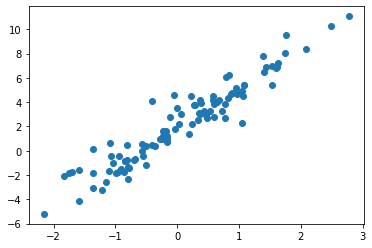

In [7]:
plt.scatter(inputs, outputs, label = 'Original data')

可以看到上图，我的数据集就是这样，有inputs，outputs。现在我要从里面找到一种模型 ，这种模型可以总结出数据集的特点。所以接下来，要构建我们的模型。一般论文中都会在模型中改方法，做工作，所以，读论文时，要关注框架图，从输入，到输出，数据怎么流入，流出，经过哪些模块，要熟悉，然后看论文的具体代码怎么实现的。

# 2.构建模型

下面就是定义的一个简单的模型，线性模型 self.W * inputs + self.b ，当然现在的模型就特别复杂，类似于下图，那么就可以看看论文的代码，看模型怎么定义

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161605758211173951616057578074.png"/>

In [9]:
# 定义模型和损失函数
class Model(object):
    def __init__(self): #初始化参数
        self.W = tf.Variable(10.0)
        self.b = tf.Variable(-5.0)
    # 基于函数定义的模型
    def __call__(self, inputs):
        return self.W * inputs + self.b
#设计它的损失函数
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

model = Model()

In [10]:
def plot(epoch): # 传入epoch参数
    plt.scatter(inputs, outputs, c = 'b')#画散点图
    #传入inputs，预测的model(inputs)
    plt.scatter(inputs, model(inputs), c = 'r')
    plt.title("epoch %2d, loss = %s"%(epoch, 
              str(compute_loss(outputs, model(inputs)).numpy())))
    #给图加上图例
    plt.legend()
    #将重新绘制该数字，这允许您以交互模式工作，如果更改了数据或格式，则允许图表本身更改
    plt.draw()
    # 打开交互模式
    plt.ion()
    #pause会把它之前的所有绘图都绘制在对应坐标系中，而不仅仅是在当前坐标系中绘图
    #plt.pause(time)函数也能实现窗口绘图（不需要plt.show）,但窗口只停留time时间便会自动关闭，然后再继续执行后面代码；
    plt.pause(1)
    plt.close()

# 3.训练模型

最主要的是训练模型，训练的主要内容是：先前向传播，计算损失，再反向传播，更新参数

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 5.67; b_true= 2.00, b_pred= -0.70, loss= 36.56


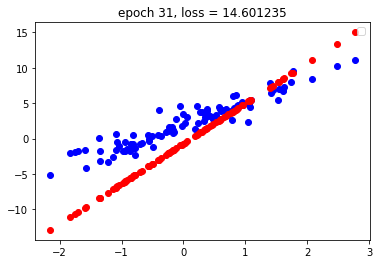

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 4.67; b_true= 2.00, b_pred= 0.34, loss= 14.60


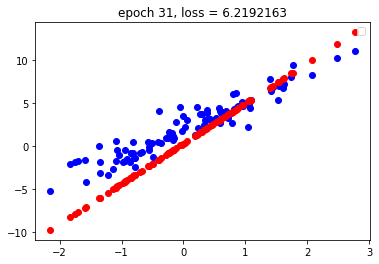

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 4.06; b_true= 2.00, b_pred= 0.99, loss= 6.22


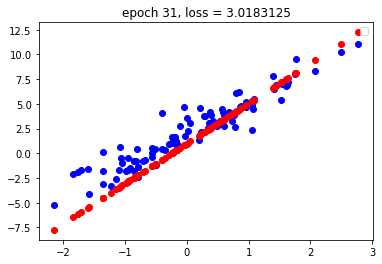

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.69; b_true= 2.00, b_pred= 1.39, loss= 3.02


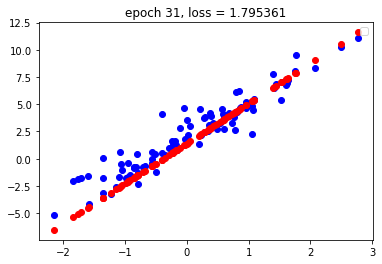

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.46; b_true= 2.00, b_pred= 1.64, loss= 1.80


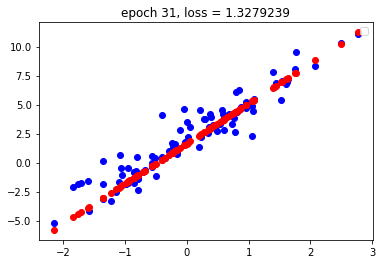

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.32; b_true= 2.00, b_pred= 1.80, loss= 1.33


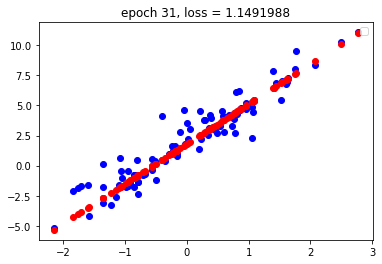

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.24; b_true= 2.00, b_pred= 1.90, loss= 1.15


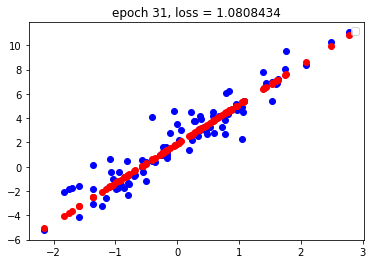

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.18; b_true= 2.00, b_pred= 1.96, loss= 1.08


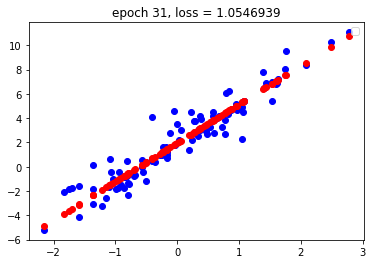

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.15; b_true= 2.00, b_pred= 2.00, loss= 1.05


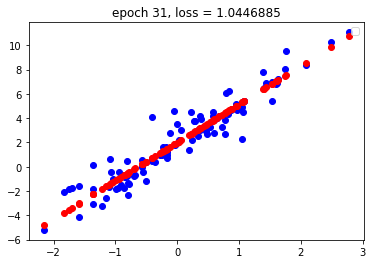

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.13; b_true= 2.00, b_pred= 2.02, loss= 1.04


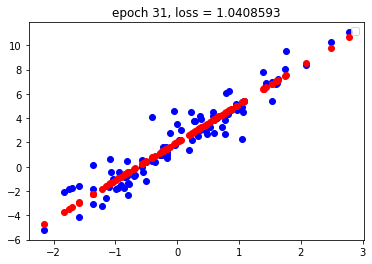

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.12; b_true= 2.00, b_pred= 2.04, loss= 1.04


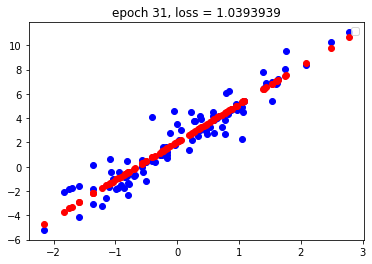

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.11; b_true= 2.00, b_pred= 2.05, loss= 1.04


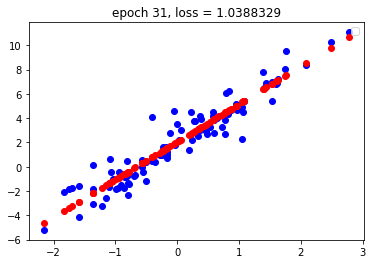

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.11; b_true= 2.00, b_pred= 2.05, loss= 1.04


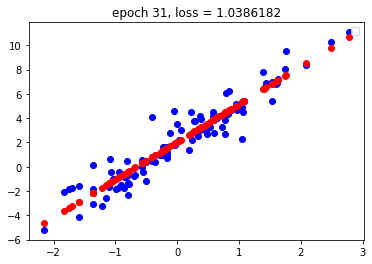

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.11; b_true= 2.00, b_pred= 2.05, loss= 1.04


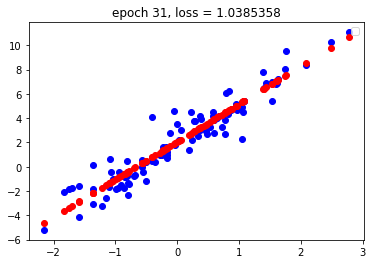

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


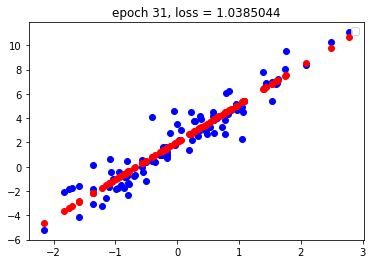

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


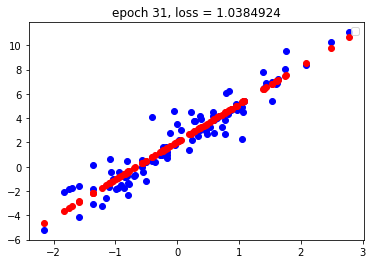

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


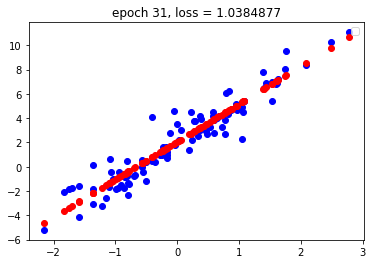

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


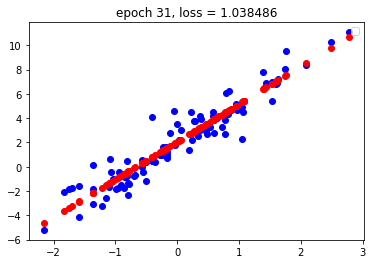

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


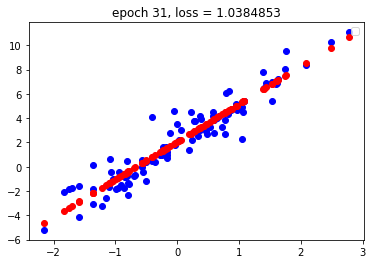

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


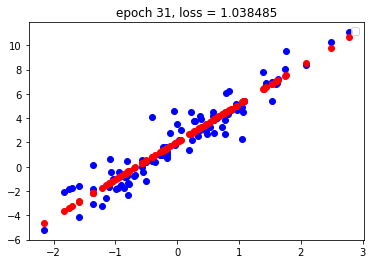

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


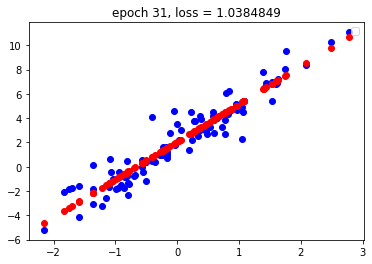

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


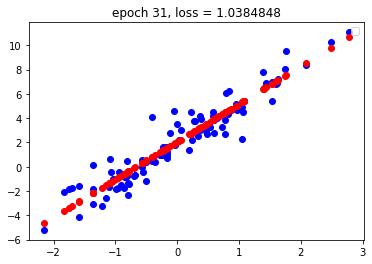

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


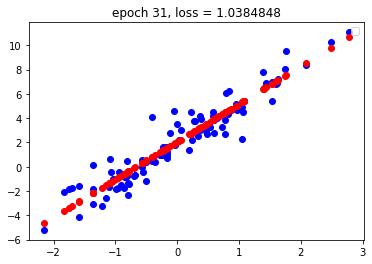

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


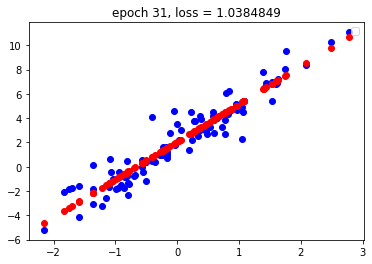

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


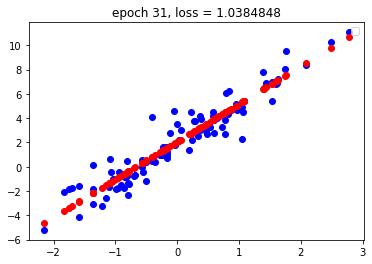

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


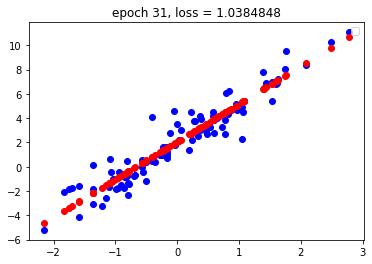

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


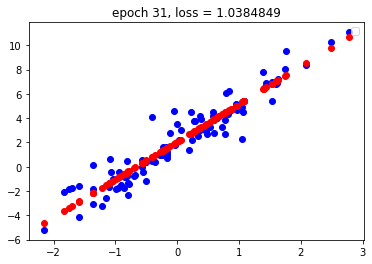

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


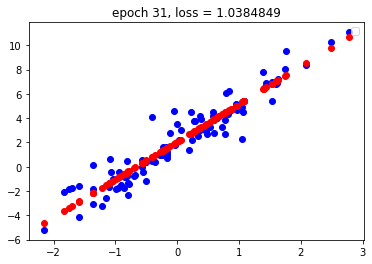

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


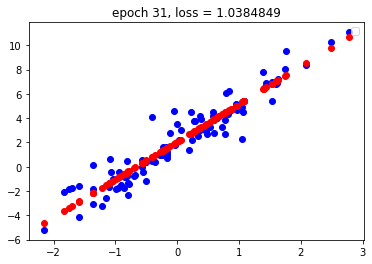

No handles with labels found to put in legend.
=> epoch 31: w_true= 3.00, w_pred= 3.10; b_true= 2.00, b_pred= 2.06, loss= 1.04


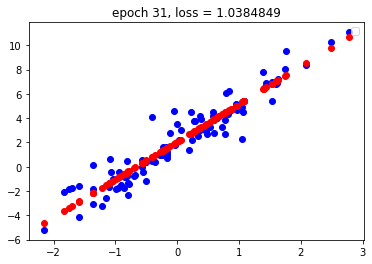

In [13]:
learning_rate = 0.2 #设置损失函数的学习率
# 设置epoch数量，1个epoch是一整个数据集
#bachsize是一次性进入网络中的样本数量，用总的数据集/bachsize = 迭代次数
epoch = 30 

for i in range(30):
    with tf.GradientTape() as tape:
        #计算损失
        loss = compute_loss(outputs, model(inputs))
        #计算题度
        dW, db = tape.gradient(loss, [model.W, model.b])

        model.W.assign_sub(learning_rate * dW) #更新权重
        model.b.assign_sub(learning_rate * db) #更新权重

        print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, True_W, model.W.numpy(), True_b, model.b.numpy(), loss.numpy()))
    plot(epoch + 1)